# EDA - Superstore dataset

### EDA

#### About data：
With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.  

dataset：https://www.kaggle.com/datasets/vivek468/superstore-dataset-final/data
  

#### Understanding data：
* Row ID => Unique ID for each row.
* Order ID => Unique Order ID for each Customer.
* Order Date => Order Date of the product.
* Ship Date => Shipping Date of the Product.
* Ship Mode=> Shipping Mode specified by the Customer.
* Customer ID => Unique ID to identify each Customer.
* Customer Name => Name of the Customer.
* Segment => The segment where the Customer belongs.
* Country => Country of residence of the Customer.
* City => City of residence of of the Customer.
* State => State of residence of the Customer.
* Postal Code => Postal Code of every Customer.
* Region => Region where the Customer belong.
* Product ID => Unique ID of the Product.
* Category => Category of the product ordered.
* Sub-Category => Sub-Category of the product ordered.
* Product Name => Name of the Product
* Sales => Sales of the Product.
* Quantity => Quantity of the Product.
* Discount => Discount provided.
* Profit => Profit/Loss incurred.

#### Confirm EDA step：
將探索數據分為三個部分：  
1. 銷售：  
    - 1.1 總銷售額與成長率
    - 1.2 總收益與成長率
    - 1.3 每年各產品類別的總銷售額與成長率
    - 1.4 每年各產品類別的利潤與成長率
    - 1.5 哪個州的銷售及獲利最高?
    - 1.6 客單價為多少?
    
2. 商品：
    - 2.1 賣出數量最多的商品
    - 2.2 最高銷售額的商品
    - 2.3 獲利最高的商品?是否與銷售額最高商品相同? 
    
3. 客戶：
    - 3.1 客人所屬占比
    - 3.2 各類別顧客需求最高的商品類別與商品是甚麼呢
    - 3.3 客戶保留率
    - 3.4 新客戶獲取率


#### Load packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [3]:
glob.glob(r"*.csv")

['Sample - Superstore.csv']

In [3]:
df = pd.read_csv("Sample - Superstore.csv", encoding= "windows-1252")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.shape

(9994, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


The following point can be observed：
* Profit column min value is -6599.98, mean value is 28.6569, too differences need to pay attention to whether there are extreme values.

In [11]:
# confirm null value and duplicated value
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [10]:
df.duplicated().sum()

0

#### 1. 銷售：

##### 1.1 總銷售額與成長率

In [4]:
df["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [5]:
df_group_category = df.copy()

In [6]:
df_group_category["Order Date"] = pd.to_datetime(df_group_category["Order Date"])
df_group_category.set_index("Order Date", inplace=True)

In [7]:
# 根據年份(resample)重新取樣資料，並將年設為索引
resampled_data = df_group_category.resample('Y').sum()
resampled_data.index = resampled_data.index.year

C:\Users\coffe\AppData\Local\Temp\ipykernel_5792\956443339.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resampled_data = df_group_category.resample('Y').sum()


In [8]:
# 計算每年Sales成長率
resampled_data["Growth_Rate_sales"] = resampled_data["Sales"].pct_change() * 100
resampled_data.fillna(0, inplace = True)

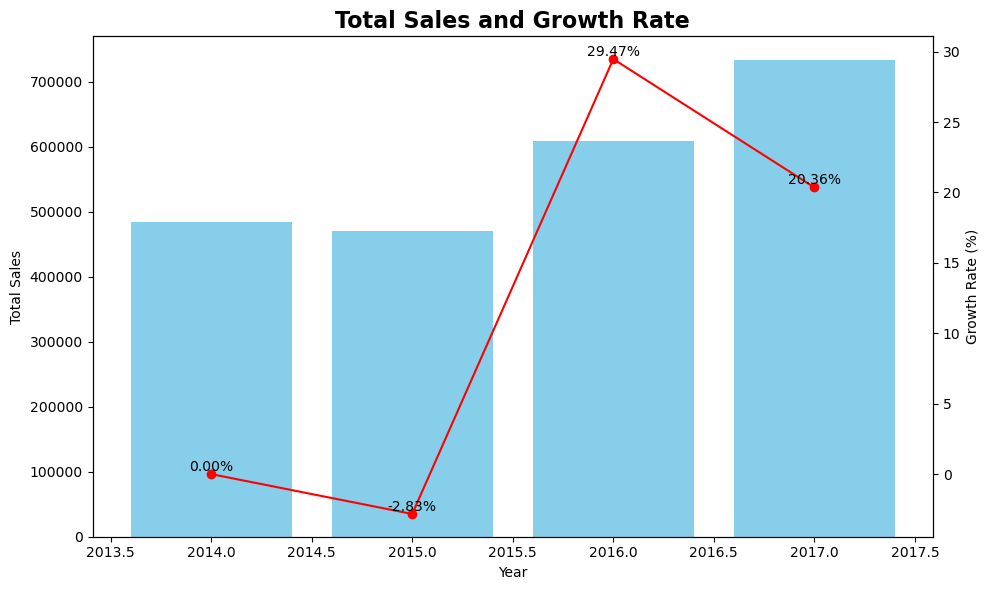

In [11]:
# Total sales and Growth Rate
fig, ax1= plt.subplots(figsize=(10, 6))
ax1.bar(resampled_data.index, resampled_data["Sales"], color = "skyblue")
ax2 = ax1.twinx()
ax2.plot(resampled_data.index, resampled_data["Growth_Rate_sales"], color = "red", marker = "o")

for i, rate in enumerate(resampled_data["Growth_Rate_sales"]):
    ax2.text(resampled_data.index[i], rate, f"{rate:.2f}%", ha="center", va="bottom", fontsize=10)
    
ax1.set_title("Total Sales and Growth Rate", weight = "bold",fontsize = "16")
ax1.set_xlabel("Year")
ax1.set_ylabel("Total Sales")
ax2.set_ylabel("Growth Rate (%)")
plt.tight_layout()
plt.show()


##### 1.2 總收益與成長率

In [13]:
# 計算每年Profit成長率
resampled_data["Growth_Rate_profit"] = resampled_data["Profit"].pct_change() * 100
resampled_data.fillna(0, inplace = True)

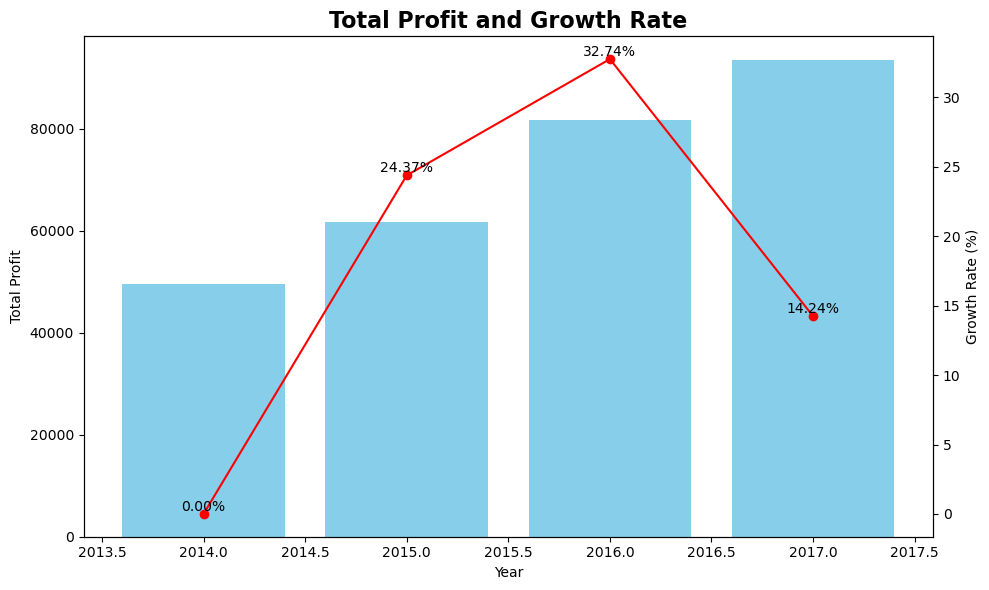

In [14]:
# Total Profit and Growth Rate
fig, ax1= plt.subplots(figsize=(10, 6))
ax1.bar(resampled_data.index, resampled_data["Profit"], color = "skyblue")
ax2 = ax1.twinx()
ax2.plot(resampled_data.index, resampled_data["Growth_Rate_profit"], color = "red", marker = "o")

for i, rate in enumerate(resampled_data["Growth_Rate_profit"]):
    ax2.text(resampled_data.index[i], rate, f"{rate:.2f}%", ha="center", va="bottom", fontsize=10)
    
ax1.set_title("Total Profit and Growth Rate", weight = "bold",fontsize = "16")
ax1.set_xlabel("Year")
ax1.set_ylabel("Total Profit")
ax2.set_ylabel("Growth Rate (%)")
plt.tight_layout()
plt.show()

##### 1.3 每年各產品類別的總銷售額與成長率


每年各商品類別的銷售額:
Order Date  Category       
2014        Furniture          157192.8531
            Office Supplies    151776.4120
            Technology         175278.2330
2015        Furniture          170518.2370
            Office Supplies    137233.4630
            Technology         162780.8090
2016        Furniture          198901.4360
            Office Supplies    183939.9820
            Technology         226364.1800
2017        Furniture          215387.2692
            Office Supplies    246097.1750
            Technology         271730.8110
Name: Sales, dtype: float64


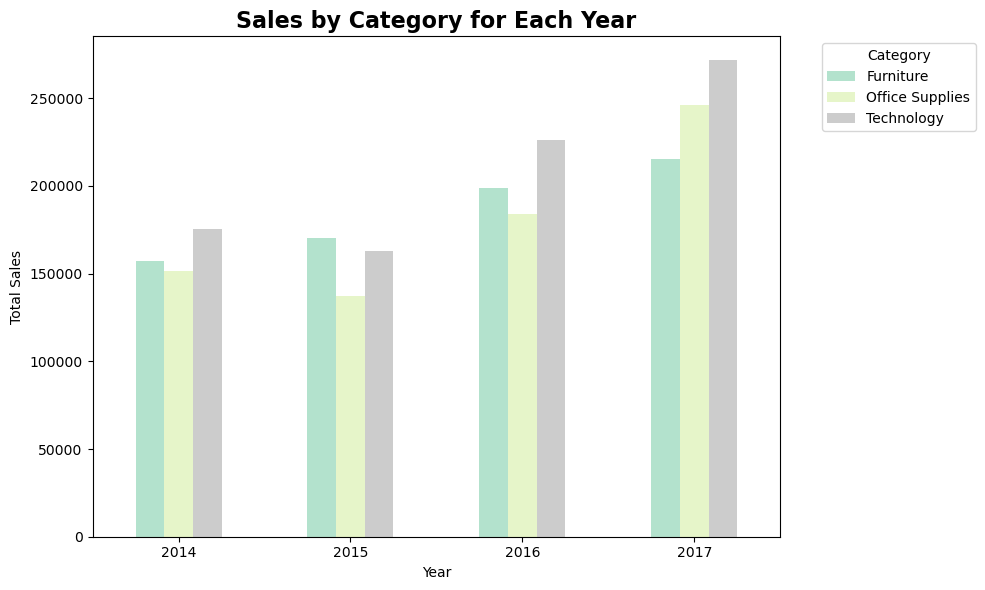

In [15]:
# 按照年份和商品類別分組，並計算每個類別的Sales總和
sales_by_year_and_category = df_group_category.groupby([df_group_category.index.year, "Category"])["Sales"].sum()
print("\n每年各商品類別的銷售額:")
print(sales_by_year_and_category)

# Sales by Category for Each Year
fig, ax = plt.subplots(figsize=(10, 6))
sales_by_year_and_category.unstack().plot(kind='bar', ax=ax, colormap='Pastel2')

ax.set_title("Sales by Category for Each Year", weight = "bold",fontsize = "16")
ax.set_xlabel("Year")
ax.set_ylabel("Total Sales")
ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()

##### 1.4 每年各產品類別的利潤與成長率


每年各商品類別的收益:
Order Date  Category       
2014        Furniture           5457.7255
            Office Supplies    22593.4161
            Technology         21492.8325
2015        Furniture           3015.2029
            Office Supplies    25099.5338
            Technology         33503.8670
2016        Furniture           6959.9531
            Office Supplies    35061.2292
            Technology         39773.9920
2017        Furniture           3018.3913
            Office Supplies    39736.6217
            Technology         50684.2566
Name: Profit, dtype: float64


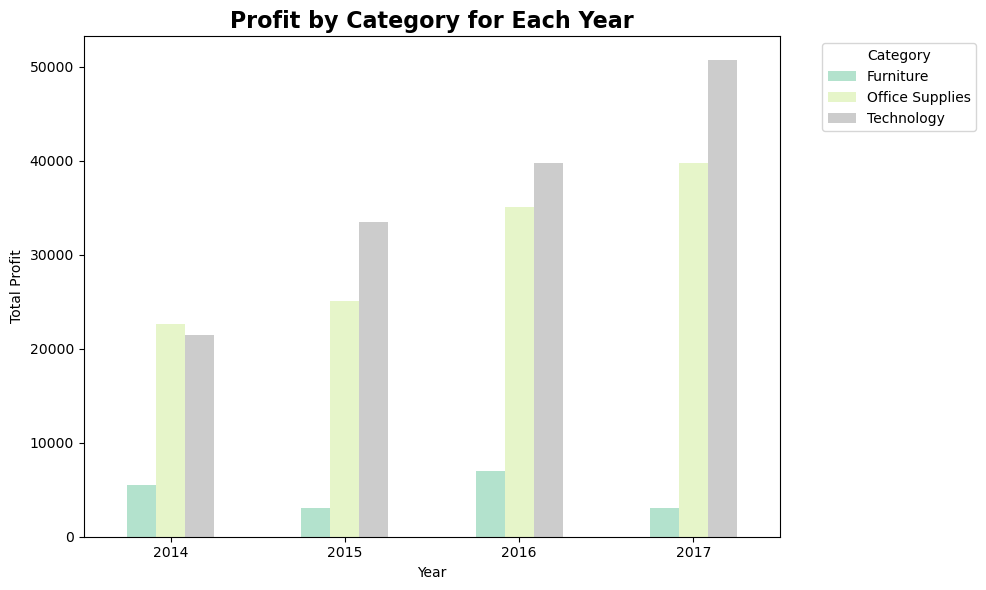

In [16]:
# 按照年份和商品類別分組，並計算每個類別的Profit總和
profit_by_year_and_category = df_group_category.groupby([df_group_category.index.year, "Category"])["Profit"].sum()
print("\n每年各商品類別的收益:")
print(profit_by_year_and_category)

# Profit by Category for Each Year
fig, ax = plt.subplots(figsize=(10, 6))
profit_by_year_and_category.unstack().plot(kind='bar', ax=ax, colormap='Pastel2')

ax.set_title("Profit by Category for Each Year", weight = "bold",fontsize = "16")
ax.set_xlabel("Year")
ax.set_ylabel("Total Profit")
ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()


以上可以觀測出以下幾點：  
* 主要的收入為類別"Technology"的商品
* 類別"Furniture"的商品雖然總銷售額高，但是利潤卻非常低
* 到目前為止(2017年)，總收益趨勢是逐年上升，但幅度趨緩，於2017年收益成長率下滑約16%

##### 1.5 哪個州的銷售及獲利最高呢?

C:\Users\coffe\AppData\Local\Temp\ipykernel_5792\3775500959.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_state = df.groupby(["State"]).sum()["Sales"].sort_values(ascending = False)


Index(['California', 'New York', 'Texas'], dtype='object', name='State')


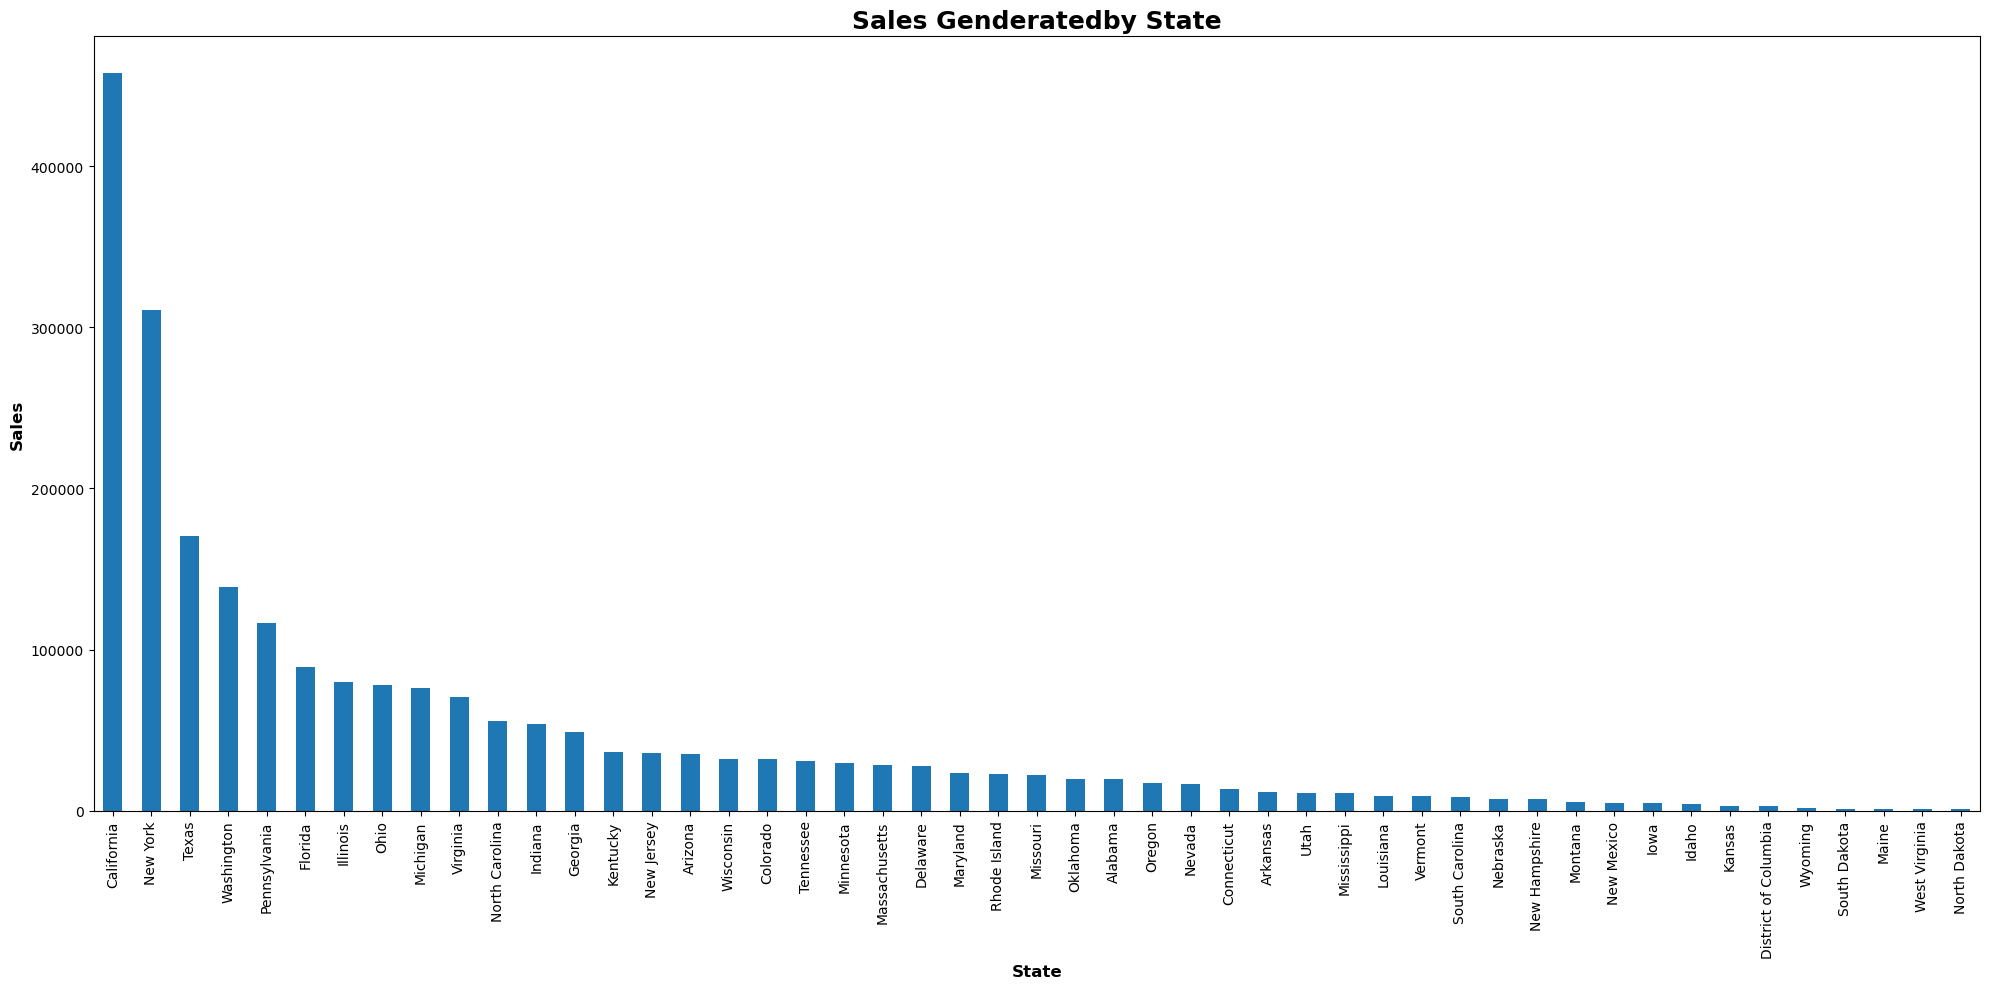

In [18]:
# 州銷售
group_state = df.groupby(["State"]).sum()["Sales"].sort_values(ascending = False)
# 州銷售前三名
print(group_state.index[0:3])

plt.figure(figsize = (20,10))
plt.title("Sales Genderatedby State", weight = "bold", fontsize = 18)
plt.xlabel("State", weight = "bold", fontsize = 12)
plt.ylabel("Sales", weight = "bold", fontsize = 12)
group_state.plot(kind = "bar")
plt.tight_layout()
plt.show()

C:\Users\coffe\AppData\Local\Temp\ipykernel_5792\2306477729.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_state_profit = df.groupby(["State"]).sum()["Profit"].sort_values(ascending = False)


Index(['California', 'New York', 'Washington'], dtype='object', name='State')


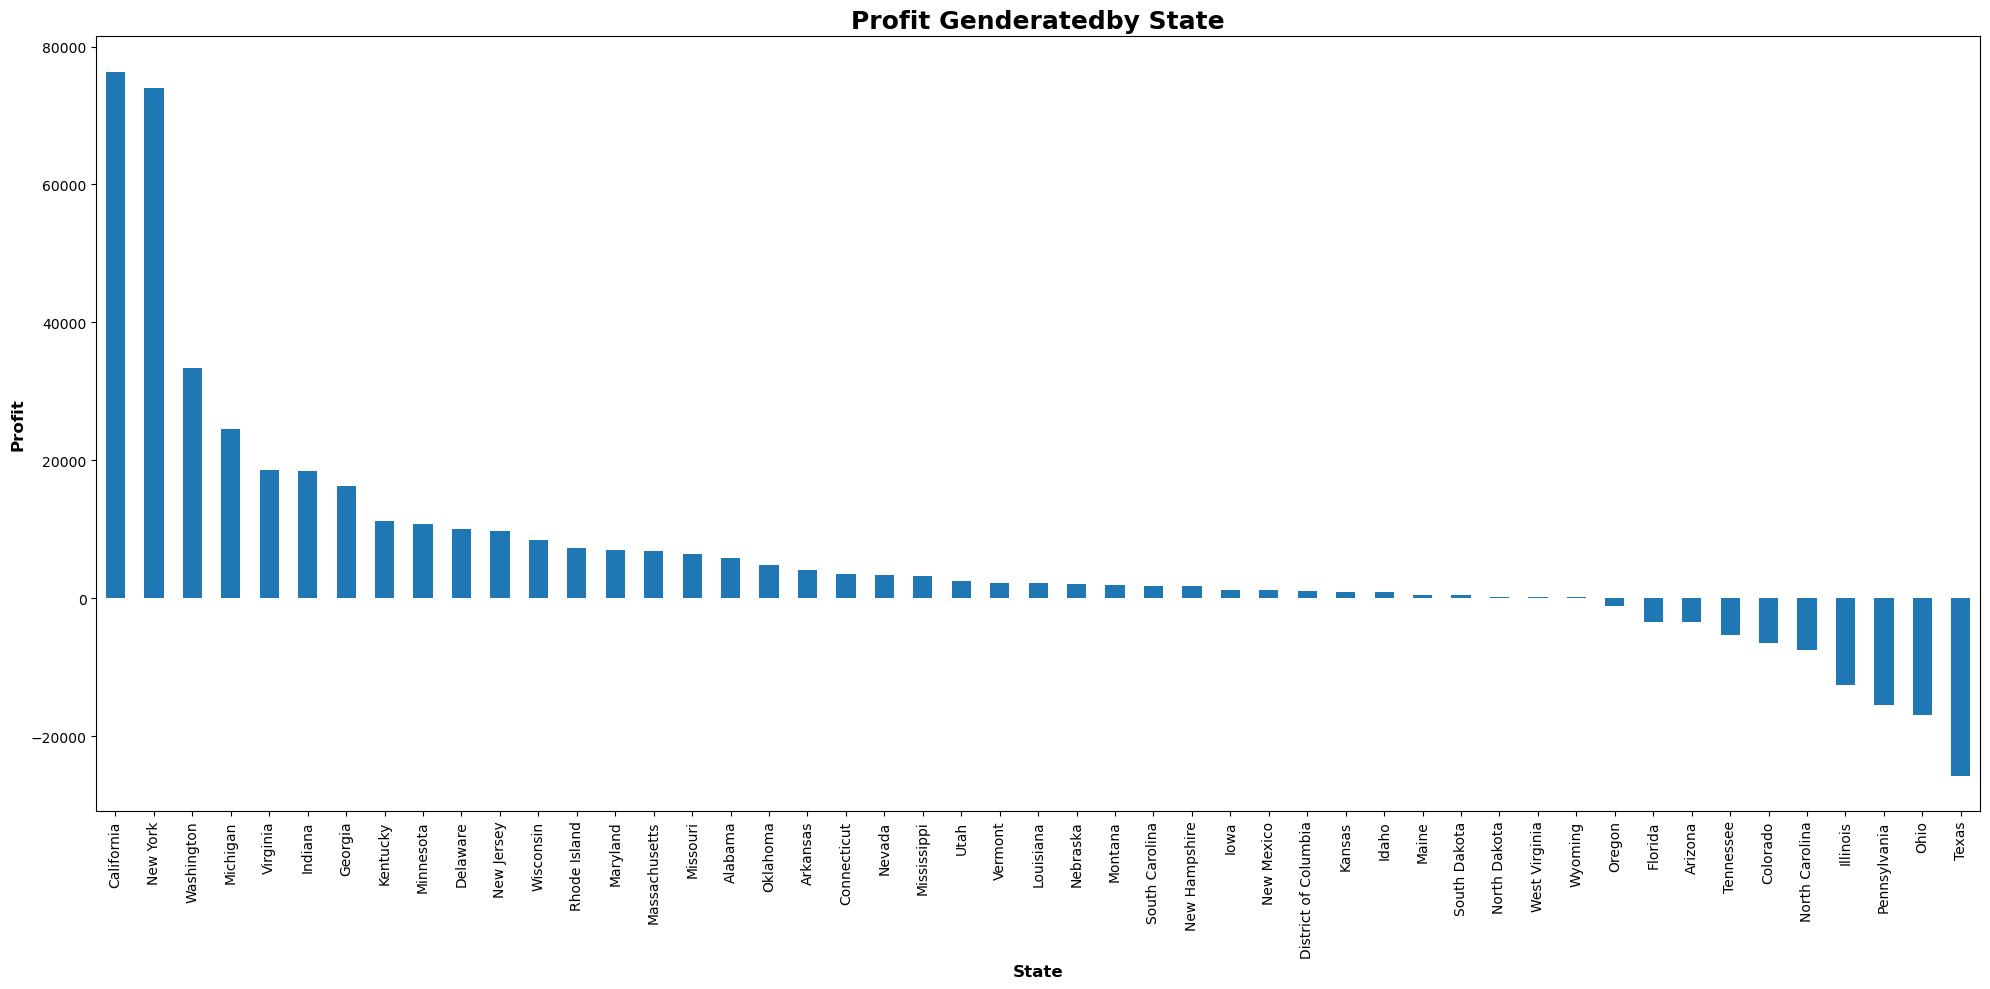

In [19]:
group_state_profit = df.groupby(["State"]).sum()["Profit"].sort_values(ascending = False)
print(group_state_profit.index[0:3])

plt.figure(figsize = (20,10))
plt.title("Profit Genderatedby State", weight = "bold", fontsize = 18)
plt.xlabel("State", weight = "bold", fontsize = 12)
plt.ylabel("Profit", weight = "bold", fontsize = 12)
group_state_profit.plot(kind = "bar")
plt.tight_layout()
plt.show()


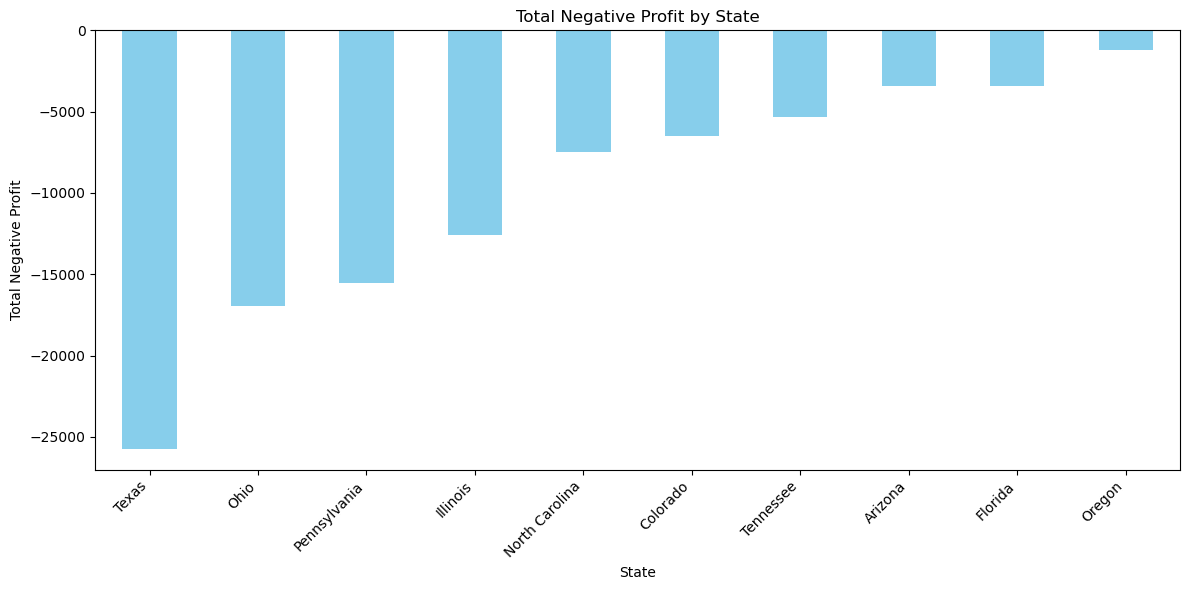

In [22]:
# 查看虧損的國家是那些
state_profit = df.groupby("State")["Profit"].sum()
negative_profit_states = state_profit[state_profit < 0]
sorted_negative_profit_states = negative_profit_states.sort_values()

# plotting
plt.figure(figsize=(12, 6))
sorted_negative_profit_states.plot(kind="bar", color="skyblue")
plt.title("Total Negative Profit by State")
plt.xlabel("State")
plt.ylabel("Total Negative Profit")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

以上可觀測出以下幾點：
* California及New York為銷售及獲利前兩名
* 共有10個國家虧損，其中催損值最大的是德克薩斯州(Texas)

##### 1.6 客單價為多少?

In [21]:
df_order_id = df.copy()

In [24]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [29]:
# 將Order Date資料更改成datatime
df_order_id["Order Date"] = pd.to_datetime(df_order_id["Order Date"])
df_order_id.set_index('Order Date', inplace=True)

# 重新取樣後已Y計算
resampled_data = df_order_id.resample('Y').sum()
resampled_data.index = resampled_data.index.year

# 計算客單價
resampled_data["Average Selling Price"] = resampled_data["Sales"] / resampled_data["Quantity"]

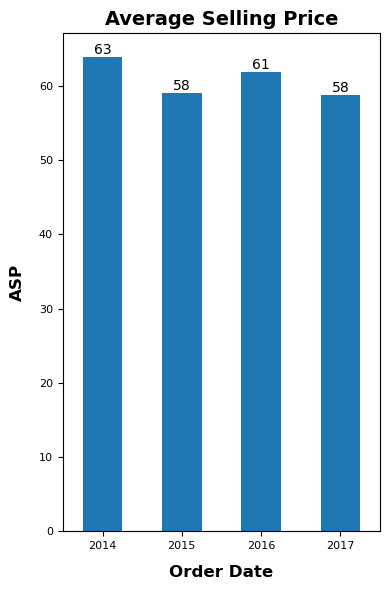

In [30]:
# ASP plotting
plt.figure(figsize = (4,6))
plt.title("Average Selling Price", weight = "bold", fontsize = 14)
plt.xlabel("YEAR", weight = "bold", fontsize = 12, labelpad = 10)
plt.ylabel("ASP", weight = "bold", fontsize = 12, labelpad = 10)
ax = resampled_data["Average Selling Price"].plot(kind = "bar")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

#增加標註
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height()), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 8)

plt.tight_layout()
plt.show()

與去年相比，ASP下降3

#### 商品

##### 2.1 賣出數量前五名的商品 

In [31]:
product_group = df.groupby(df["Product Name"]).sum()["Quantity"]
top_5_sell_products = product_group.sort_values(ascending = False)[:5]
print(top_5_sell_products) 

Product Name
Staples                       215
Staple envelope               170
Easy-staple paper             150
Staples in misc. colors        86
KI Adjustable-Height Table     74
Name: Quantity, dtype: int64


C:\Users\coffe\AppData\Local\Temp\ipykernel_5792\2562581056.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_group = df.groupby(df["Product Name"]).sum()["Quantity"]


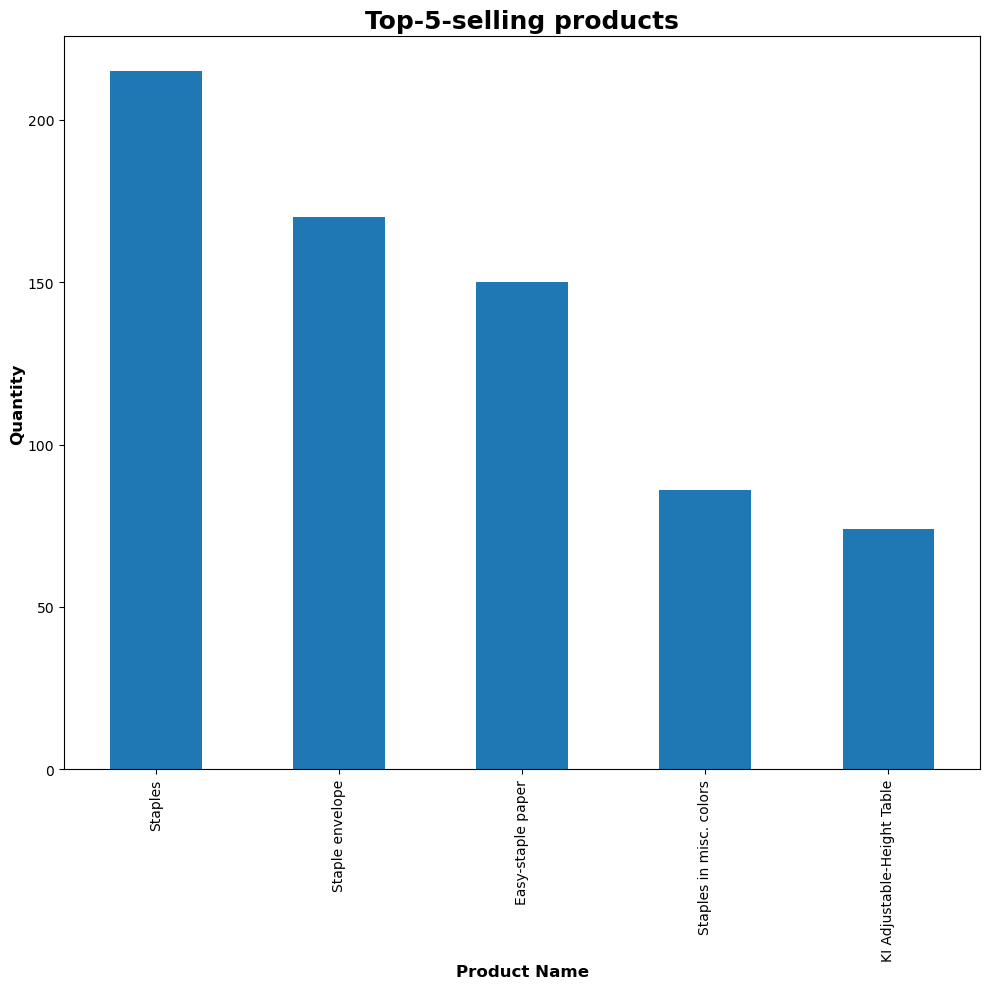

In [32]:
# plotting
fig = plt.figure(figsize = (10,10))
plt.title("Top-5-selling products", weight = "bold", fontsize = 18)
plt.xlabel("Product Name", weight = "bold",fontsize = 12, labelpad = 2)
plt.ylabel("Quantity", weight = "bold", fontsize = 12, labelpad = 2)
top_5_sell_products.plot(kind = "bar")
plt.tight_layout()
plt.show()


##### 2.2 銷售額前五名的商品是? 

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64


C:\Users\coffe\AppData\Local\Temp\ipykernel_5792\1596067478.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_5_sales = df.groupby(df["Product Name"]).sum()["Sales"].sort_values(ascending = False)[:5]


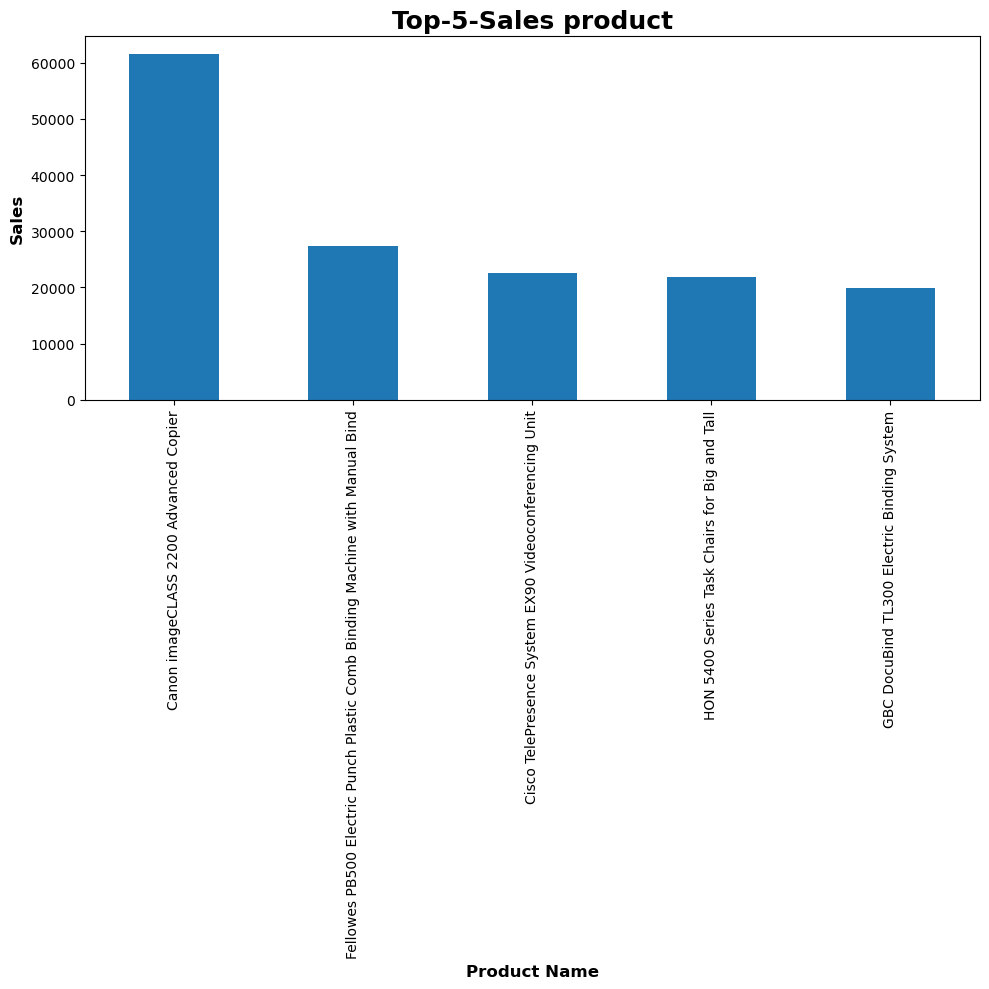

In [34]:
top_5_sales = df.groupby(df["Product Name"]).sum()["Sales"].sort_values(ascending = False)[:5]
print(top_5_sales)

# plotting
fig = plt.figure(figsize = (10, 10))
plt.title("Top-5-Sales product", weight = "bold", fontsize = 18)
plt.xlabel("Product Name", weight = "bold", fontsize = 12)
plt.ylabel("Sales", weight = "bold", fontsize = 12)
top_5_sales.plot(kind = "bar")
plt.tight_layout()
plt.show()

##### 2.3 獲利前五名的商品?

Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Name: Profit, dtype: float64


C:\Users\coffe\AppData\Local\Temp\ipykernel_5792\3196663419.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_5_profit_product = df.groupby(df["Product Name"]).sum()["Profit"].sort_values(ascending = False)[:5]


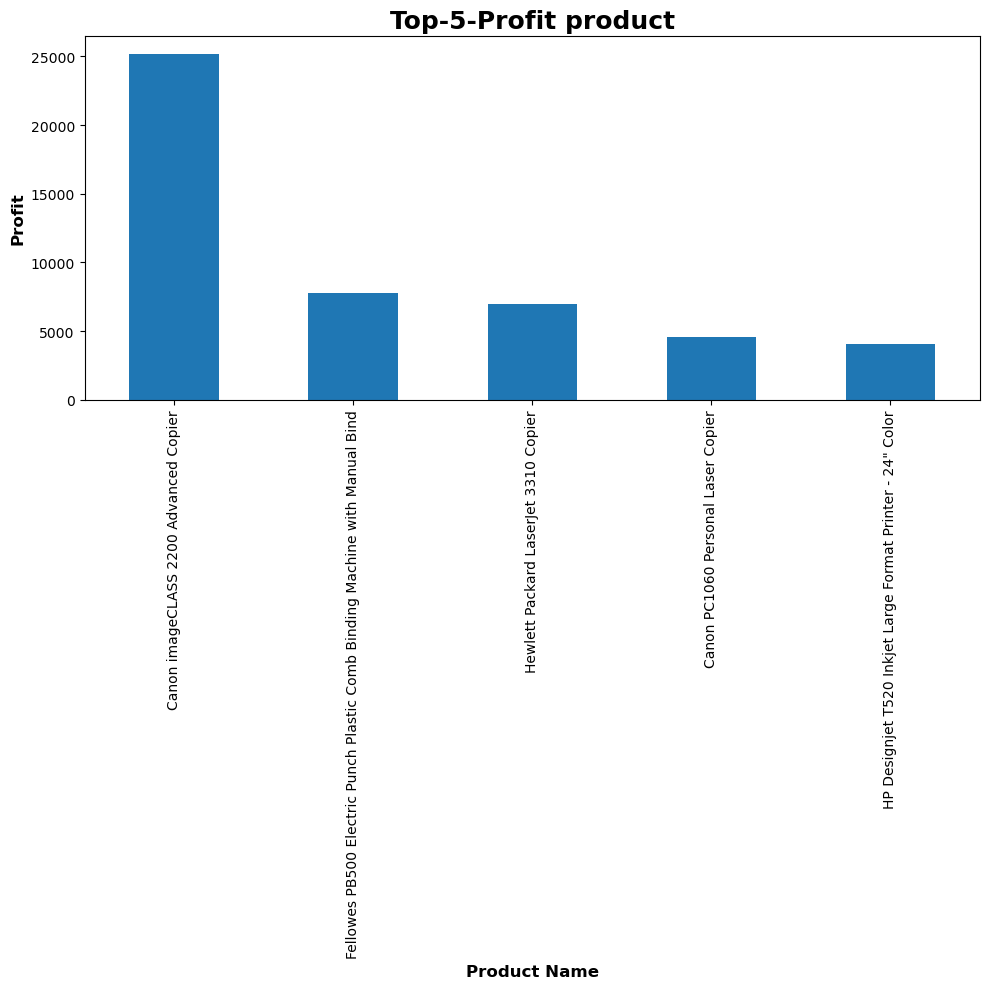

In [35]:
top_5_profit_product = df.groupby(df["Product Name"]).sum()["Profit"].sort_values(ascending = False)[:5]
print(top_5_profit_product)

# plotting
fig = plt.figure(figsize = (10, 10))
plt.title("Top-5-Profit product", weight = "bold", fontsize = 18)
plt.xlabel("Product Name", weight = "bold", fontsize =  12)
plt.ylabel("Profit", weight = "bold", fontsize = 12)
top_5_profit_product.plot(kind = "bar")
plt.tight_layout()
plt.show()

In [36]:
# 確認銷售額前五名與利潤前五名是否相同
top_5_sales.index == top_5_profit_product.index

array([ True,  True, False, False, False])

In [37]:
# 從上方可發現銷售額與獲利前兩名是一樣的
# 查看此兩樣商品在US的銷售狀況
df["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

##### 2.3.1 查看銷售額與獲利前兩名在US的銷售狀況

C:\Users\coffe\AppData\Local\Temp\ipykernel_5792\2683081234.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_group = product.groupby(["Region"]).mean()[["Sales","Profit"]]


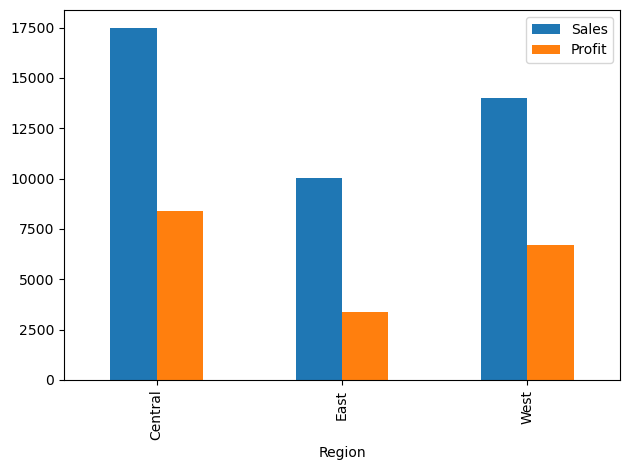

In [38]:
# Canon imageCLASS 2200 Advanced Copier

product = df[df["Product Name"] == "Canon imageCLASS 2200 Advanced Copier"]
region_group = product.groupby(["Region"]).mean()[["Sales","Profit"]]
# region_group.head()

region_group.plot(kind = "bar")
plt.tight_layout()
plt.show()

C:\Users\coffe\AppData\Local\Temp\ipykernel_5792\944071527.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_group = product.groupby(["Region"]).mean()[["Sales", "Profit"]]


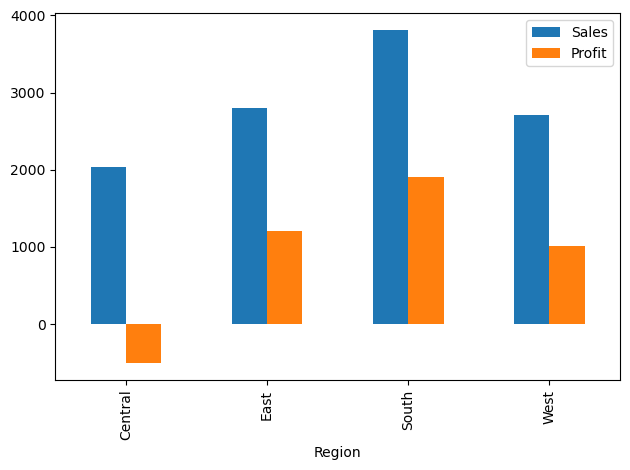

In [39]:
# Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind"

product = df[df["Product Name"] == "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind"]
region_group = product.groupby(["Region"]).mean()[["Sales", "Profit"]]
# region_group.head()

region_group.plot(kind = "bar")
plt.tight_layout()
plt.show()

In [40]:
# 確認Central的銷售狀況
product = df[(df["Product Name"] == "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind") & (df["Region"] == "Central")]
product

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2846,2847,CA-2017-152093,9/10/2017,9/15/2017,Standard Class,SN-20560,Skye Norling,Home Office,United States,Chicago,...,60653,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,762.594,3,0.8,-1143.891
5310,5311,CA-2017-131254,11/19/2017,11/21/2017,First Class,NC-18415,Nathan Cano,Consumer,United States,Houston,...,77095,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,1525.188,6,0.8,-2287.782
7683,7684,CA-2015-120782,4/28/2015,5/1/2015,First Class,SD-20485,Shirley Daniels,Home Office,United States,Midland,...,48640,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,3812.970,3,0.0,1906.485


以上可觀測出以下幾點：
* 賣出數量最多的商品是Staple(訂書針)
* "Canon imageCLASS 2200 Advanced Copier"及 "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind" 為銷售額與獲利前兩名商品
* Canon imageCLASS 2200 Advanced Copier這項產品只有在Central、East、West有銷售狀況，並且以平均值來看，中美洲的產品銷售和獲利是最佳的
* Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind這項產品在全美洲都有銷售狀況，並且在南美洲的商品銷售和獲利最高，但其中可以觀測到此產品在中美洲的獲利是虧損的，原因與折扣有關。

#### 3. 客戶

##### 3.1 客人所屬占比

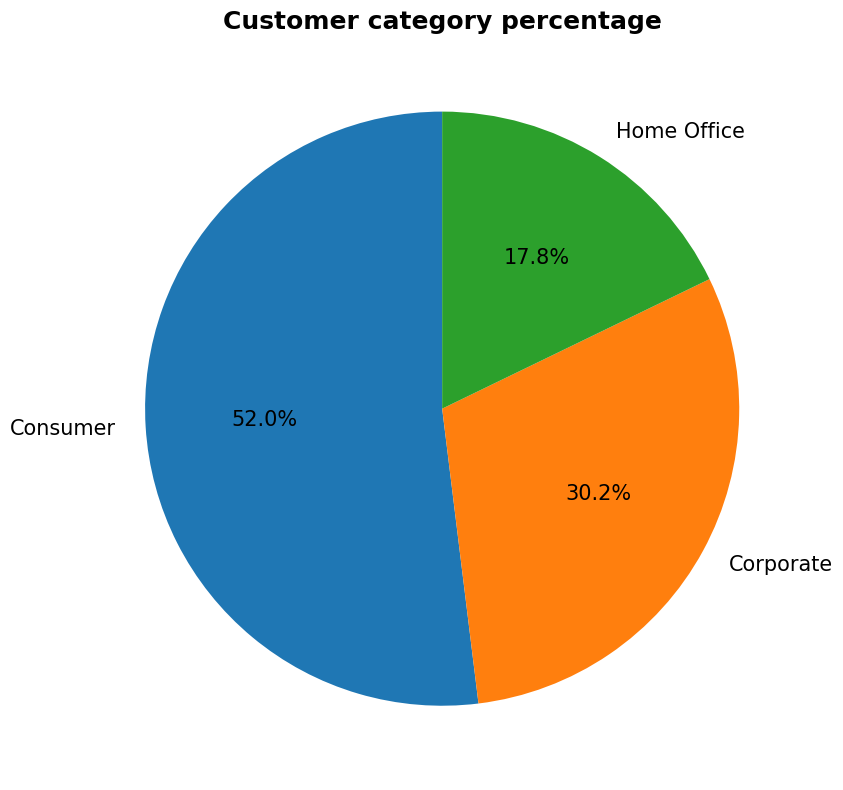

In [42]:
Segment_cnt = df["Segment"].value_counts(normalize = True).round(3)*100

plt.figure(figsize = (10,8))
plt.pie(Segment_cnt, 
        labels = df["Segment"].unique(), 
        textprops = {"size": 15},
        autopct = "%1.1f%%", #將數值百分位並留到小數點一位
        startangle = 90)
plt.title("Customer category percentage", weight = "bold", fontsize = 18)
plt.tight_layout()
plt.show()

##### 3.2 各類別顧客需求最高的商品類別與商品是甚麼呢

##### 3.2.1 Consumer

一般顧客需求商品類別排序：
Category
Office Supplies    3127
Furniture          1113
Technology          951
Name: Category, dtype: int64


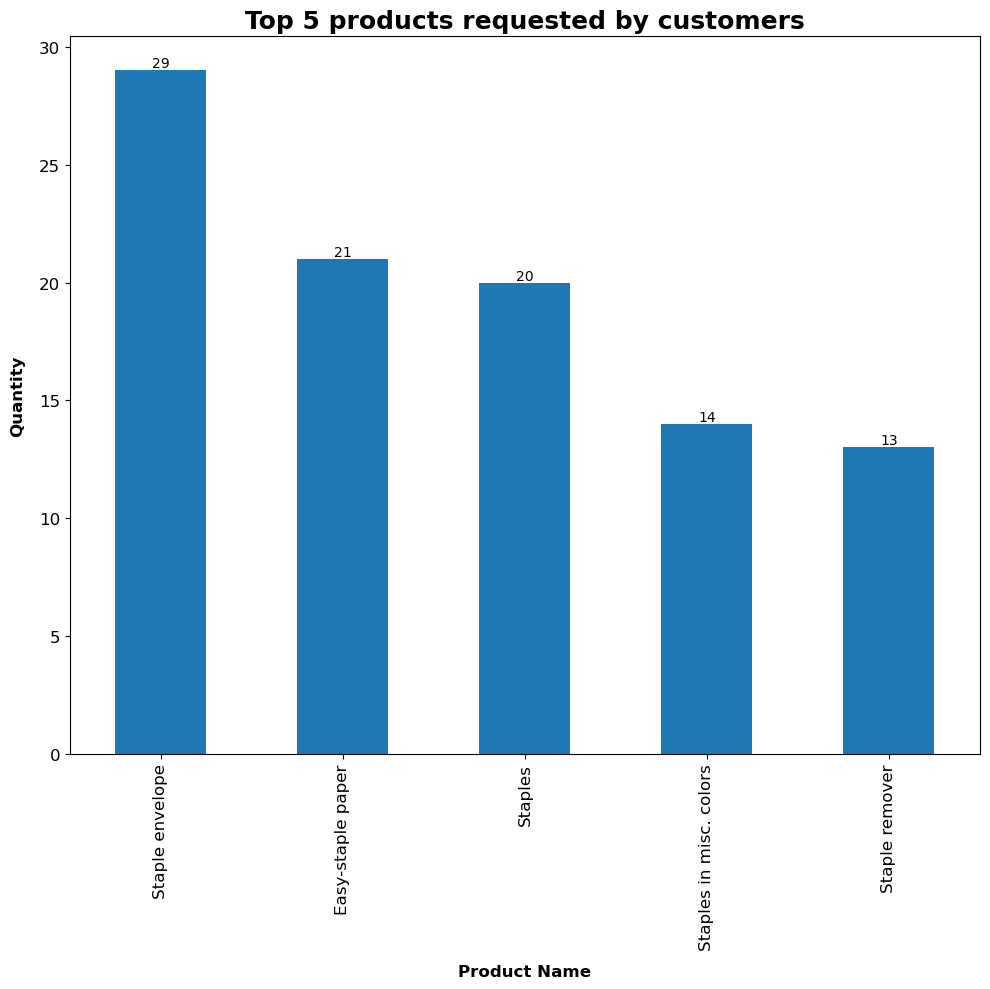

In [49]:
customer_category = df.groupby("Segment")["Category"].value_counts()["Consumer"]
print("一般顧客需求商品類別排序：")
print(customer_category)

customer_product = df.groupby("Segment")["Product Name"].value_counts()["Consumer"]
customer_product_top5 = customer_product[:5]

# plotting
plt.figure(figsize = (10,10))
plt.title("Top 5 products requested by customers", weight = "bold", fontsize = 18)
plt.xlabel("Product Name", weight = "bold", fontsize = 12, labelpad = 10)
plt.ylabel("Quantity", weight = "bold", fontsize = 12, labelpad = 10)
ax = customer_product_top5.plot(kind = "bar")

# annotate
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height()), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 12)

plt.tight_layout()
plt.show()

##### 3.2.2 corporate

企業需求商品類別排序：
Category
Office Supplies    1820
Furniture           646
Technology          554
Name: Category, dtype: int64


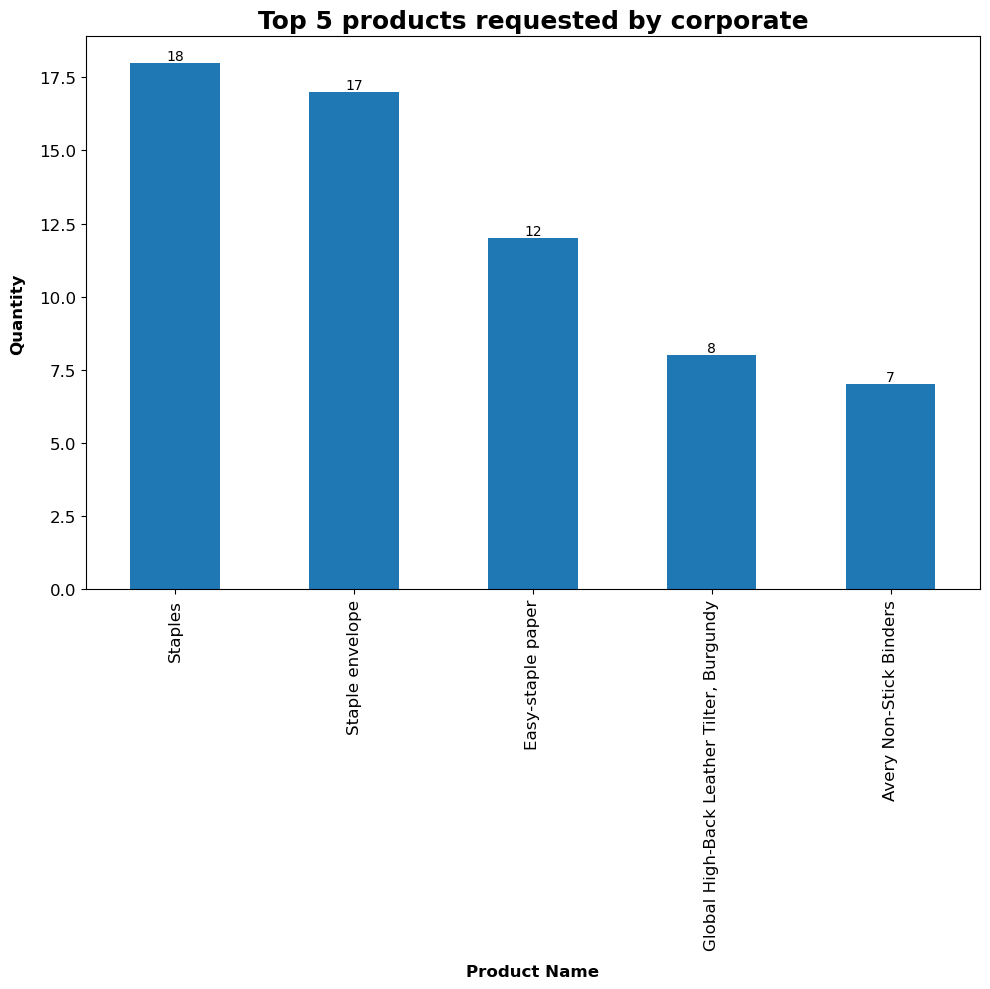

In [50]:
cor_category = df.groupby("Segment")["Category"].value_counts()["Corporate"]
print("企業需求商品類別排序：")
print(cor_category)

cor_product = df.groupby("Segment")["Product Name"].value_counts()["Corporate"]
cor_product_top5 = cor_product[:5]

# plotting
plt.figure(figsize = (10,10))
plt.title("Top 5 products requested by corporate", weight = "bold", fontsize = 18)
plt.xlabel("Product Name", weight = "bold", fontsize = 12, labelpad = 10)
plt.ylabel("Quantity", weight = "bold", fontsize = 12, labelpad = 10)
ax = cor_product_top5.plot(kind = "bar")

# annotate
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height()), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 12)

plt.tight_layout()
plt.show()

##### 3.2.3 Home Office

小型辦公室需求商品類別排序：
Category
Office Supplies    1079
Furniture           362
Technology          342
Name: Category, dtype: int64


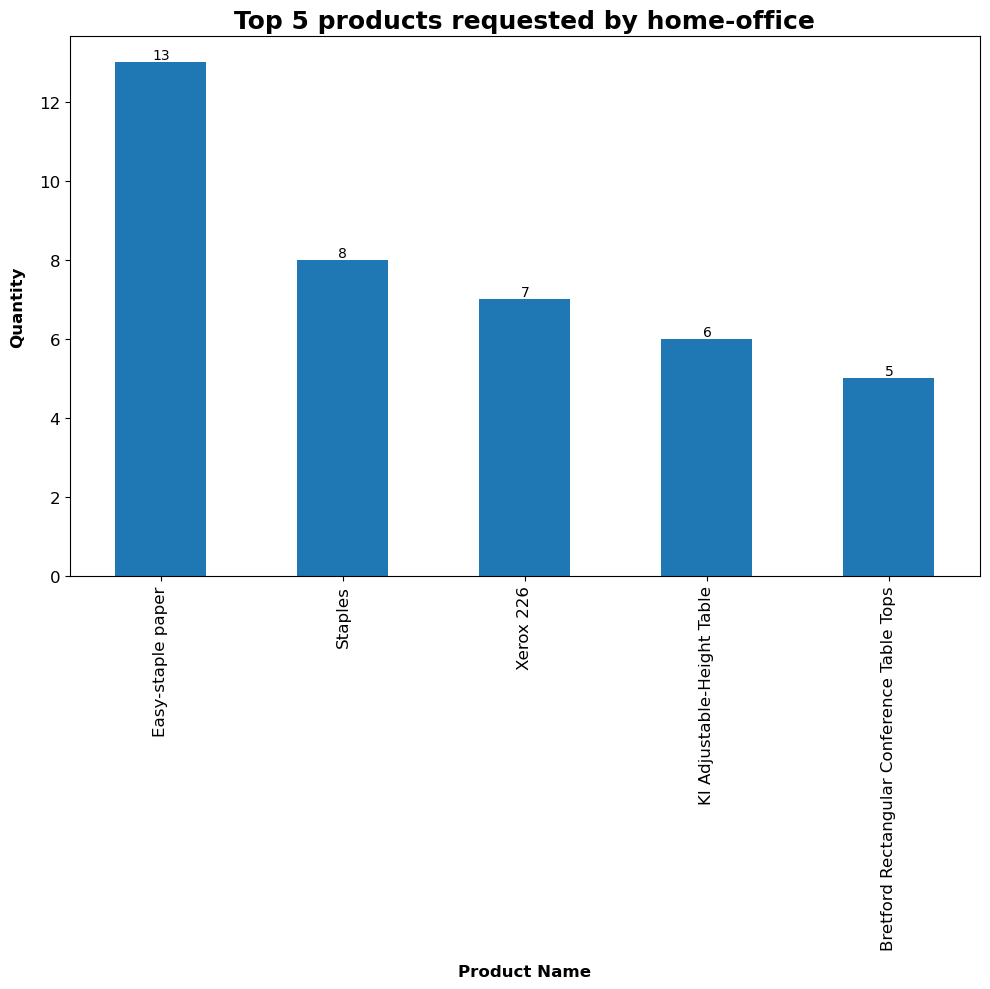

In [52]:
homeOffice_category = df.groupby("Segment")["Category"].value_counts()["Home Office"]
print("小型辦公室需求商品類別排序：")
print(homeOffice_category)

homeOffice_product = df.groupby("Segment")["Product Name"].value_counts()["Home Office"]
homeOffice_product_top5 = homeOffice_product[:5]

# plotting
plt.figure(figsize = (10,10))
plt.title("Top 5 products requested by home-office", weight = "bold", fontsize = 18)
plt.xlabel("Product Name", weight = "bold", fontsize = 12, labelpad = 10)
plt.ylabel("Quantity", weight = "bold", fontsize = 12, labelpad = 10)
ax = homeOffice_product_top5.plot(kind = "bar")

# annotate
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height()), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 12)

plt.tight_layout()
plt.show()

以上可觀測出以下幾點：
* 客戶中有52%為一般顧客，接著是企業，最後是家庭辦公室/小型辦公室
* 客戶需求最高的商品類別皆為"Office Supplies"
* 一般顧客購買數量最多的是Staple envelope(信封)，並且前五名皆與文具有關
* 企業購買數量最多的是Staple(訂書針)，前五名除了文具外還有皮革高背椅
* 小型企業購買數量最多的是Easy-staple paper(易裝釘紙)，前五名中還包含影印紙、桌子等

##### 3.3 客戶保留率

In [53]:
df_CRR = df.copy()

# 轉換為datetime後以年計算
df_CRR["Order Date"] = pd.to_datetime(df_CRR["Order Date"])
df_CRR["Order Year"] = df_CRR["Order Date"].dt.year

In [57]:
customer_counts = df_CRR.groupby("Order Year")["Customer ID"].nunique()

# 找出保留的客戶數量
retained_customers = {}
for year, group in df_CRR.groupby("Order Year"):
    if year > df_CRR["Order Year"].min():
        # 找出前一年的客戶列表
        previous_year_customers = df_CRR[df_CRR["Order Year"] == year - 1]["Customer ID"].unique()
        # 找出保留的客戶數量
        retained_customers[year] = df_CRR[(df_CRR["Order Year"] == year) & (df_CRR["Customer ID"].isin(previous_year_customers))]["Customer ID"].nunique()
# print(retained_customers)

# 計算客戶保留率
customer_retention_rate = {}
for year, retained_customers_count in retained_customers.items():
    if year > df_CRR["Order Year"].min():
        # 找出前一年的客戶總數
        previous_year_customers_count = customer_counts[year - 1]
        # 計算客戶留存率
        retention_rate = retained_customers_count / previous_year_customers_count
        customer_retention_rate[year] = retention_rate
# print(customer_retention_rate)

# 輸出結果
for year, retention_rate in customer_retention_rate.items():
    retention_rate = round((retention_rate * 100), 2)
    print(f"{year}年的客戶保留率： {retention_rate}%")

2015年的客戶保留率： 73.45%
2016年的客戶保留率： 78.88%
2017年的客戶保留率： 87.46%


##### 3.4 新客戶獲取率

In [58]:
new_customer_df = df.copy()

new_customer_df["Order Date"] = pd.to_datetime(new_customer_df["Order Date"])

In [63]:
# 按照年份分組，找出每年的獨立客戶數量
customer_counts_by_year = new_customer_df.groupby(new_customer_df["Order Date"].dt.year)["Customer ID"].nunique()

new_customers_dict = {}
existing_customers = set()

for year, group in new_customer_df.groupby(new_customer_df["Order Date"].dt.year):
    # 當年的新客戶是在當年出現但是之前年份沒有出現過的客戶
    new_customers = group[~group["Customer ID"].isin(existing_customers)]["Customer ID"].nunique()
    new_customers_dict[year] = new_customers
    # 將當年出現的客戶加入到之前年份出現過的客戶集合中
    existing_customers.update(group["Customer ID"].unique())

# 將新客戶數量轉換為 Series
new_customers_by_year = pd.Series(new_customers_dict)

# 計算每年的新客戶獲取率
new_customer_acquisition_rate_by_year = new_customers_by_year / customer_counts_by_year

for year, rate in new_customer_acquisition_rate_by_year.items():
    if year == 2014:
        continue
    rate = round(rate * 100, 2)
    print(f"{year}年的新客戶獲取率: {rate}%")

2015年的新客戶獲取率: 23.73%
2016年的新客戶獲取率: 7.99%
2017年的新客戶獲取率: 1.59%


從以上可得知，客戶保留率逐年增加，但是新客戶獲取率卻大幅下降

#### RFM分析

In [64]:
df_RFM = df.copy()

In [65]:
## M (Monetary)
monetary = df_RFM.groupby("Customer ID")["Sales"].sum()
monetary = monetary.to_frame()

## F (Frequency)
frequency = df_RFM.groupby("Customer ID")["Sales"].count()
frequency = frequency.to_frame()

fm = monetary.merge(frequency, on = "Customer ID", how = "inner")
fm.rename(columns = {"Sales_x": "Monetary", "Sales_y": "Frequency"}, inplace = True)

In [66]:
## R (Recency)
df_RFM["Order Date"] = pd.to_datetime(df_RFM["Order Date"])
maximun = max(df_RFM["Order Date"])
maximun = maximun + pd.DateOffset(days = 1)  # avoid day_diff = 0
df_RFM["day_diff"] = maximun - df_RFM["Order Date"]
df_RFM["day_diff"]

recency = df_RFM.groupby("Customer ID")["day_diff"].min()
# Take the minimum value as an indicator of the customer’s latest purchase
recency = recency.to_frame()

In [67]:
## RFM merge
RFM = fm.merge(recency, on = "Customer ID", how = "inner")
RFM.rename(columns = {"day_diff": "Recency"}, inplace = True)
RFM = RFM.reset_index()

In [68]:
## RFM analytic
RFM_norm1 = RFM.drop("Customer ID", axis = 1)
RFM_norm1.Recency = RFM_norm1.Recency.dt.days 

# Take quartiles
quantiles = RFM_norm1.quantile(q = [0.25, 0.5, 0.75])

In [69]:
def R_class(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
# The smaller the R value, the greater the customer's value to the store.
    
def FM_class(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
#The greater the FM value, the greater the customer's value to the store.

In [70]:
RFM_Segment = RFM_norm1.copy()
RFM_Segment["R_Quartile"] = RFM_Segment["Recency"].apply(R_class, args = ("Recency", quantiles))
RFM_Segment["F_Quartile"] = RFM_Segment["Frequency"].apply(FM_class, args = ("Frequency", quantiles))
RFM_Segment["M_Quartile"] = RFM_Segment["Monetary"].apply(FM_class, args = ("Monetary", quantiles))

RFM_Segment["RFMClass"] = RFM_Segment.R_Quartile.map(str) + RFM_Segment.F_Quartile.map(str) + RFM_Segment.M_Quartile.map(str)

In [71]:
# A - 重要挽留客戶 
# 重要挽留客戶約8.9%
RFM_Segment_A = RFM_Segment[(RFM_Segment["M_Quartile"] == 4) & (RFM_Segment["R_Quartile"] != 4) & (RFM_Segment["F_Quartile"] != 4)]

len(RFM_Segment_A) # 71
len(RFM_Segment_A) / len(RFM_Segment) # 0.08953341740226986

# B - 重要保持客戶
# 約8.3%
RFM_Segment_B = RFM_Segment[(RFM_Segment["M_Quartile"] == 4) & (RFM_Segment["R_Quartile"] != 4) & (RFM_Segment["F_Quartile"] == 4)]
RFM_Segment_B

len(RFM_Segment_B) # 66
len(RFM_Segment_B) / len(RFM_Segment) # 0.0832282471626734

# C - 重要發展客戶
# 約4%
RFM_Segment_C = RFM_Segment[(RFM_Segment["M_Quartile"] == 4) & (RFM_Segment["R_Quartile"] == 4) & (RFM_Segment["F_Quartile"] != 4)]
RFM_Segment_C

len(RFM_Segment_C) # 32
len(RFM_Segment_C) / len(RFM_Segment) # 0.0403530895334174

# D - 重要價值客戶 
# 黃金客佔全部顧客的比例約有3.6%
RFM_Segment_D = RFM_Segment[RFM_Segment["RFMClass"] == "444"]
len(RFM_Segment_D) # 29
len(RFM_Segment[RFM_Segment["RFMClass"] == "444"]) / len(RFM_Segment) # 0.03656998738965952

# 重要價值客戶總數
# 約 24.9%
len(RFM_Segment_A + RFM_Segment_B + RFM_Segment_C + RFM_Segment_D) / len(RFM_Segment)
# 0.24968474148802017

# 一般挽留客戶
# 約49.5%
RFM_Segment_gen_A = RFM_Segment[(RFM_Segment["R_Quartile"] != 4) & (RFM_Segment["F_Quartile"] != 4) & (RFM_Segment["M_Quartile"] != 4)]
len(RFM_Segment_gen_A) #393
len(RFM_Segment_gen_A) / len(RFM_Segment) # 0.49558638083228246

# 一般保持客戶
# 約7.5%
RFM_Segment_gen_B = RFM_Segment[(RFM_Segment["R_Quartile"] != 4) & (RFM_Segment["F_Quartile"] == 4) & (RFM_Segment["M_Quartile"] != 4)]
len(RFM_Segment_gen_B) # 60
len(RFM_Segment_gen_B) / len(RFM_Segment) # 0.07566204287515763

# 一般發展客戶
# 約13.7%
RFM_Segment_gen_C = RFM_Segment[(RFM_Segment["R_Quartile"] == 4) & (RFM_Segment["F_Quartile"] != 4) & (RFM_Segment["M_Quartile"] != 4)]
len(RFM_Segment_gen_C) # 109
len(RFM_Segment_gen_C) / len(RFM_Segment) # 0.13745271122320302

# 一般價值客戶
# 約 4.1%
RFM_Segment_gen_D = RFM_Segment[(RFM_Segment["R_Quartile"] == 4) & (RFM_Segment["F_Quartile"] == 4) & (RFM_Segment["M_Quartile"] != 4)]
len(RFM_Segment_gen_D) # 33
len(RFM_Segment_gen_D) / len(RFM_Segment) # 0.0416141235813367

0.0416141235813367

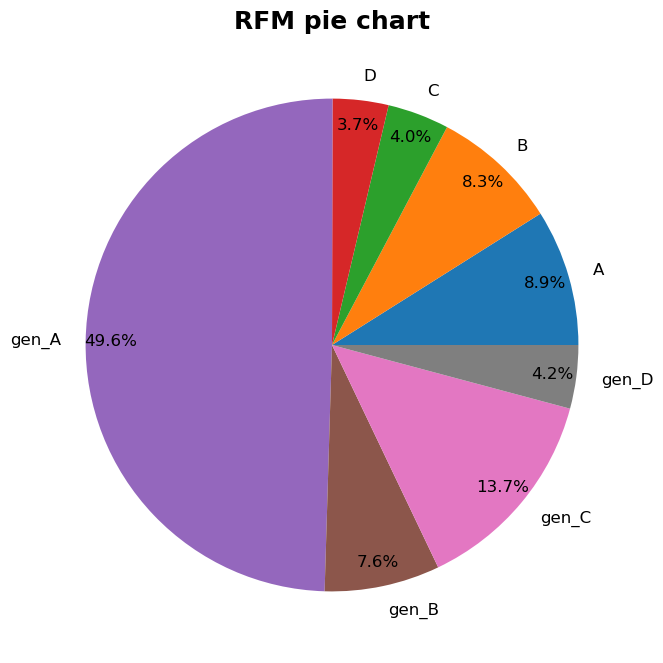

In [72]:
# RFM圖形
def float_to_percentage(number):
    percentage = round(number * 100, 2)
    # percentage_str = "{:.2f}%".format(percentage)
    # return percentage_str
    return percentage

Segment_len = len(RFM_Segment)

RFM_A_percent = float_to_percentage(len(RFM_Segment_A) / Segment_len)
RFM_B_percent = float_to_percentage(len(RFM_Segment_B) / Segment_len)
RFM_C_percent = float_to_percentage(len(RFM_Segment_C) / Segment_len)
RFM_D_percent = float_to_percentage(len(RFM_Segment_D) / Segment_len)
RFM_genA_percent = float_to_percentage(len(RFM_Segment_gen_A) / Segment_len)
RFM_genB_percent = float_to_percentage(len(RFM_Segment_gen_B) / Segment_len)
RFM_genC_percent = float_to_percentage(len(RFM_Segment_gen_C) / Segment_len)
RFM_genD_percent = float_to_percentage(len(RFM_Segment_gen_D) / Segment_len)

RFM_tem = pd.Series([RFM_A_percent,
                     RFM_B_percent,
                     RFM_C_percent,
                     RFM_D_percent,
                     RFM_genA_percent,
                     RFM_genB_percent,
                     RFM_genC_percent,
                     RFM_genD_percent],
                    index = ["A",
                              "B",
                              "C",
                              "D",
                              "gen_A",
                              "gen_B",
                              "gen_C",
                              "gen_D"])

# A:"重要挽留客戶",
# B:重要保持客戶",
# C:重要發展客戶",
# D:"重要價值客戶",
# gen_A:"一般挽留客戶",
# gen_B:"一般保持客戶",
# gen_C:"一般發展客戶",
# gen_D:"一般價值客戶"

plt.figure(figsize = (10,8))
plt.title("RFM pie chart", weight = "bold", fontsize = 18)
plt.pie(RFM_tem, 
        labels = RFM_tem.index,
        textprops = {"size": 12},
        autopct = '%.1f%%',
        pctdistance = 0.9)
plt.show()


從以上可得知：
* 一般挽留客戶(資料標籤gen_A，R↓F↓M↓)占比最大，購買時間久遠，購買頻率低，購買金額也較低，但這類型的客戶卻占大多數，針對這些客戶，須進行客戶調查，是否是因為價格或是產品性質、服務等因素，才導致客戶不再購買
* 第二大的是一般發展客戶(資料標籤gen_C，R↑F↓M↓)，近期消費過但消費頻率和金額都較低的顧客，針對這些客戶可以進行促銷、折扣等方式等方式激勵購買
* 重要價值客戶占比約1/4，針對這些客戶，需進一步分析需求和偏好，提供更個性化的服務或商品，可以考慮更密切的客戶關係(例如更佳的服務或是專屬優惠...等)

#### Power BI Dashboard

<img src="powerbi_img.png" width="900px">